Привет! Меня зовут Валерий Гриднев, я провожу ревью твоей работы. Предлагаю общаться на «ты», если не против.

В работе ты увидишь комментарии, помеченные разным цветом.

<div class="alert alert-success">
Зеленым цветом помечены оброзцовые решения. Которые можно использовать в дальнейшем.
</div>

<div class="alert alert-warning">
Желтым цветом отмечено то, что ты можешь улучшить или доработать. Можешь учесть это при выполнении следующих работ или доработать проект сейчас, но это не обязательно.
</div>

<div class="alert alert-danger">
Красным цветом помечены моменты, которые необходимо доработать, чтобы проект был принят. Уверен, что у тебя все получится. Буду ждать твою работу на повторное ревью. 
</div>

Будет комфортнее работать над проектом вместе, если ты будешь **писать об изменениях** в проекте по моим рекомендациям. Для этого выбери для своих комментариев 

<div class="alert alert-block alert-info">заметный цвет</div>

Пожалуйста, **не перемещай, не изменяй и не удаляй мои комментарии**. Всё это поможет выполнить повторную проверку твоего проекта оперативнее.
___

# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Шаг 1. Откройте файл с данными и изучите общую информацию. 

In [1185]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [1380]:
#data = pd.read_csv('real_estate_data.csv', sep='\t')

In [1187]:
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')

<div class="alert alert-danger">
    
**Комментарий ревьюера**

Ошибка загрузки, подрузил сам и попробую проверить дальше)Но без исправления принять не смогу
</div>

<div class="alert alert-block alert-info">
   Исправил
</div>

In [1188]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [1189]:
for col in data.columns:
    display(data[col])

0        20
1         7
2        10
3         0
4         2
         ..
23694     9
23695    14
23696    18
23697    13
23698     4
Name: total_images, Length: 23699, dtype: int64

0        13000000.0
1         3350000.0
2         5196000.0
3        64900000.0
4        10000000.0
            ...    
23694     9700000.0
23695     3100000.0
23696     2500000.0
23697    11475000.0
23698     1350000.0
Name: last_price, Length: 23699, dtype: float64

0        108.00
1         40.40
2         56.00
3        159.00
4        100.00
          ...  
23694    133.81
23695     59.00
23696     56.70
23697     76.75
23698     32.30
Name: total_area, Length: 23699, dtype: float64

0        2019-03-07T00:00:00
1        2018-12-04T00:00:00
2        2015-08-20T00:00:00
3        2015-07-24T00:00:00
4        2018-06-19T00:00:00
                ...         
23694    2017-03-21T00:00:00
23695    2018-01-15T00:00:00
23696    2018-02-11T00:00:00
23697    2017-03-28T00:00:00
23698    2017-07-21T00:00:00
Name: first_day_exposition, Length: 23699, dtype: object

0        3
1        1
2        2
3        3
4        2
        ..
23694    3
23695    3
23696    2
23697    2
23698    1
Name: rooms, Length: 23699, dtype: int64

0        2.70
1         NaN
2         NaN
3         NaN
4        3.03
         ... 
23694    3.70
23695     NaN
23696     NaN
23697    3.00
23698    2.50
Name: ceiling_height, Length: 23699, dtype: float64

0        16.0
1        11.0
2         5.0
3        14.0
4        14.0
         ... 
23694     5.0
23695     5.0
23696     3.0
23697    17.0
23698     5.0
Name: floors_total, Length: 23699, dtype: float64

0        51.0
1        18.6
2        34.3
3         NaN
4        32.0
         ... 
23694    73.3
23695    38.0
23696    29.7
23697     NaN
23698    12.3
Name: living_area, Length: 23699, dtype: float64

0         8
1         1
2         4
3         9
4        13
         ..
23694     3
23695     4
23696     1
23697    12
23698     1
Name: floor, Length: 23699, dtype: int64

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
        ... 
23694    NaN
23695    NaN
23696    NaN
23697    NaN
23698    NaN
Name: is_apartment, Length: 23699, dtype: object

0        False
1        False
2        False
3        False
4        False
         ...  
23694    False
23695    False
23696    False
23697    False
23698    False
Name: studio, Length: 23699, dtype: bool

0        False
1        False
2        False
3        False
4        False
         ...  
23694    False
23695    False
23696    False
23697    False
23698    False
Name: open_plan, Length: 23699, dtype: bool

0        25.00
1        11.00
2         8.30
3          NaN
4        41.00
         ...  
23694    13.83
23695     8.50
23696      NaN
23697    23.30
23698     9.00
Name: kitchen_area, Length: 23699, dtype: float64

0        NaN
1        2.0
2        0.0
3        0.0
4        NaN
        ... 
23694    NaN
23695    NaN
23696    NaN
23697    2.0
23698    NaN
Name: balcony, Length: 23699, dtype: float64

0            Санкт-Петербург
1             посёлок Шушары
2            Санкт-Петербург
3            Санкт-Петербург
4            Санкт-Петербург
                ...         
23694        Санкт-Петербург
23695                  Тосно
23696       село Рождествено
23697        Санкт-Петербург
23698    поселок Новый Учхоз
Name: locality_name, Length: 23699, dtype: object

0        18863.0
1        12817.0
2        21741.0
3        28098.0
4        31856.0
          ...   
23694    24665.0
23695        NaN
23696        NaN
23697    39140.0
23698        NaN
Name: airports_nearest, Length: 23699, dtype: float64

0        16028.0
1        18603.0
2        13933.0
3         6800.0
4         8098.0
          ...   
23694     4232.0
23695        NaN
23696        NaN
23697    10364.0
23698        NaN
Name: cityCenters_nearest, Length: 23699, dtype: float64

0        1.0
1        0.0
2        1.0
3        2.0
4        2.0
        ... 
23694    1.0
23695    NaN
23696    NaN
23697    2.0
23698    NaN
Name: parks_around3000, Length: 23699, dtype: float64

0        482.0
1          NaN
2         90.0
3         84.0
4        112.0
         ...  
23694    796.0
23695      NaN
23696      NaN
23697    173.0
23698      NaN
Name: parks_nearest, Length: 23699, dtype: float64

0        2.0
1        0.0
2        2.0
3        3.0
4        1.0
        ... 
23694    3.0
23695    NaN
23696    NaN
23697    3.0
23698    NaN
Name: ponds_around3000, Length: 23699, dtype: float64

0        755.0
1          NaN
2        574.0
3        234.0
4         48.0
         ...  
23694    381.0
23695      NaN
23696      NaN
23697    196.0
23698      NaN
Name: ponds_nearest, Length: 23699, dtype: float64

0          NaN
1         81.0
2        558.0
3        424.0
4        121.0
         ...  
23694      NaN
23695     45.0
23696      NaN
23697    602.0
23698      NaN
Name: days_exposition, Length: 23699, dtype: float64

### Объявим функцию для подсчёта процента пустых значений

In [1190]:
import numpy as np

In [1191]:
def complex_function(col_name):
    percent = data[col_name].isna().sum() / len(data[col_name]) * 100
    print(f'Кол-во пропусков: {data[col_name].isna().sum()}')
    print(f'Процент пустых даннных по отношению к всем: {percent}')
    print(f'Кол-во уникальных значений: {len(data[col_name].value_counts())}')

In [1192]:
def is_na():
    print(data.isna().sum())

In [1193]:
# 0 - рассматриваемое значение
def fill_empty_center(row, center_city_median, group_name, global_median):

    if np.isnan(row[group_name]):

        if np.isnan(center_city_median[row['locality_name']]):
            return global_median
        else:
            return center_city_median[row['locality_name']]
    else:
        return row[group_name]


def fill_na_of_city(group_name):

    center_city_median = {}
    centre_group = data.groupby('locality_name')
    global_median = data[group_name].median()

    for (first, second) in centre_group:
        center_city_median[first] = second[group_name].median()

    data[group_name] = data[[group_name, 'locality_name']].apply(fill_empty_center, args=([center_city_median, group_name, global_median]),
                                                          axis=1)

In [1194]:
def compare_data(first_data, second_data):
    for col in ['floor', 'floors_total', 'ceiling_height', 'balcony', 'living_area', 'rooms', 'last_price']:
        try:
            print(f'Среднее значение {col} для {first_data[col].mean()} сравниваем с {second_data[col].mean()} их отношение : \
{first_data[col].mean() / second_data[col].mean()}')
        except:
            pass

Функция для подсчёта среднего значения по каждому городу и заполнение пустыъ значений по заданному полю

<div class="alert alert-success">
    
**Комментарий ревьюера**
    
Хорошая идея, но стоило описать тогда уже все функции или завернуть всё в одну)
</div>

<div class="alert alert-block alert-info">
    Собрал из двух в одну, оставил is_na(), это тестовая функция при разработке
</div>

## Рассмотрим столбцы поотдельности, оценим пропуски и возможности их появления

### Расстояние до ближайшего аэропорта в метрах, узнаем сколько пропусков и проверим распределение расстояния до ближайшего аэропорта

In [1195]:
complex_function('airports_nearest')

Кол-во пропусков: 5542
Процент пустых даннных по отношению к всем: 23.384952951601335
Кол-во уникальных значений: 8275


In [1196]:
data['airports_nearest'].describe()

count    18157.000000
mean     28793.672193
std      12630.880622
min          0.000000
25%      18585.000000
50%      26726.000000
75%      37273.000000
max      84869.000000
Name: airports_nearest, dtype: float64

In [1197]:
data.query('airports_nearest < 1000')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
21085,0,7000000.0,34.7,2018-09-23T00:00:00,1,2.7,9.0,19.8,3,NaN,...,6.0,2.0,Санкт-Петербург,0.0,22801.0,0.0,NaN,0.0,NaN,60.0


<AxesSubplot:ylabel='Frequency'>

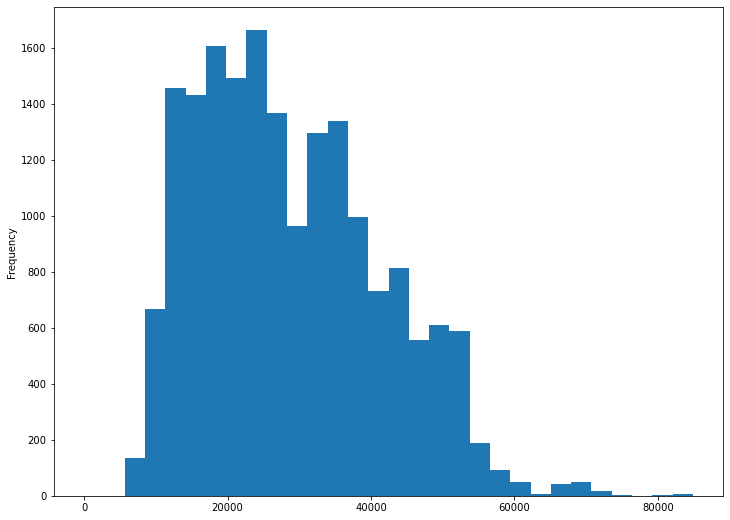

In [1198]:
data['airports_nearest'].plot(kind='hist', bins=30, figsize=(12,9))

Как видим, что значений менее 1000 метров всего(1), значения более 80_000 метров можем убрать их всего (7), поэтому их мы уберём, чтобы не сдвигать среднее вправо на малом колличестве больших значений 

In [1199]:
air_further = data.query('airports_nearest >= 80000')
display(air_further.describe())
print(f'Кол-во выбросов аэропортов более 80000 метров {len(air_further)}')

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,7.000000,7.000000e+00,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,5.0,7.000000,7.000000,7.0,0.0,7.0,0.0,5.000000
mean,11.142857,3.650000e+06,51.742857,2.428571,2.521429,4.142857,33.214286,2.285714,6.242857,1.0,83587.571429,64686.571429,0.0,NaN,0.0,NaN,515.200000
std,6.121780,3.547299e+05,5.630233,0.534522,0.026726,0.899735,5.187623,0.951190,0.863823,0.0,1500.854630,1500.854630,0.0,NaN,0.0,NaN,557.486502
min,1.000000,3.200000e+06,43.500000,2.000000,2.500000,3.000000,27.200000,1.000000,5.000000,1.0,81355.000000,62454.000000,0.0,NaN,0.0,NaN,13.000000
25%,7.500000,3.450000e+06,48.450000,2.000000,2.500000,3.500000,29.550000,2.000000,5.600000,1.0,82682.500000,63781.500000,0.0,NaN,0.0,NaN,121.000000
50%,13.000000,3.600000e+06,51.400000,2.000000,2.500000,4.000000,31.000000,2.000000,6.500000,1.0,84006.000000,65105.000000,0.0,NaN,0.0,NaN,205.000000
75%,15.000000,3.825000e+06,55.700000,3.000000,2.550000,5.000000,36.950000,2.500000,7.000000,1.0,84759.000000,65858.000000,0.0,NaN,0.0,NaN,1043.000000
max,19.000000,4.200000e+06,59.000000,3.000000,2.550000,5.000000,41.300000,4.000000,7.000000,1.0,84869.000000,65968.000000,0.0,NaN,0.0,NaN,1194.000000


Кол-во выбросов аэропортов более 80000 метров 7


Пустые значения расстояния до ближайшего аэропорта заменим нулями, так как эти значения вписывали не пользователи, а рассчёты по картам, то значит, что в городе может не быть аэрпорта, или он находится очень далеко за пределами города, как значения 80_000, поэтому, чтобы не рандомно вписывать большие расстояния покажем, что в городе просто нет аэропорта

<div class="alert alert-success">
    
**Комментарий ревьюера**
    
А где и как мы это делаем?) Также я бы сказал, что в России не каждый 80км есть аэропорт, поэтому именно в этом признаке не факт что это выбросы)
</div>

<div class="alert alert-success">
    
**Комментарий ревьюера**
    
Окей, 7 строк терпимо)
</div>

<div class = 'alert alert-info'>
Сделал под гистограммой выводы 
</div>

## Теперь рассмотрим кол-во балконов в каждом доме  balcony 

In [1200]:
complex_function('balcony')

Кол-во пропусков: 11519
Процент пустых даннных по отношению к всем: 48.605426389299126
Кол-во уникальных значений: 6


In [1201]:
data['balcony'].value_counts()

1.0    4195
0.0    3758
2.0    3659
5.0     304
4.0     183
3.0      81
Name: balcony, dtype: int64

Отсутствующие значения числа балконов заменим на 0,так как, если у человека нет балкона в жилом помещении он его просто пропустил бы. Преобразуем к типу int64, так как число балконов не может быть дробным

<div class="alert alert-success">
    
**Комментарий ревьюера**
    
Молодец)
</div>

## Рассмотрим значения высоты потолков ceiling_height 

In [1202]:
complex_function('ceiling_height')

Кол-во пропусков: 9195
Процент пустых даннных по отношению к всем: 38.799105447487236
Кол-во уникальных значений: 183


In [1203]:
print(data['ceiling_height'].value_counts())
print(f'Кол-во разных значений потолков: {len(data["ceiling_height"].value_counts())}')

2.50      3515
2.60      1646
2.70      1574
3.00      1112
2.80       993
          ... 
27.50        1
5.00         1
3.59         1
4.80         1
100.00       1
Name: ceiling_height, Length: 183, dtype: int64
Кол-во разных значений потолков: 183


In [1204]:
very_height_ceil = data.query('ceiling_height > 5')
print(f'кол-во очень высоких потолков {len(very_height_ceil)}')
very_height_ceil

кол-во очень высоких потолков 36


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
355,17,3600000.0,55.2,2018-07-12T00:00:00,2,25.0,5.0,32.0,2,False,...,NaN,2.0,Гатчина,NaN,NaN,NaN,NaN,NaN,NaN,259.0
464,15,66571000.0,280.3,2015-06-11T00:00:00,6,5.2,8.0,159.5,7,NaN,...,21.1,0.0,Санкт-Петербург,26316.0,6655.0,3.0,187.0,1.0,616.0,578.0
1026,20,155000000.0,310.0,2018-10-12T00:00:00,5,5.3,3.0,190.0,3,NaN,...,63.0,2.0,Санкт-Петербург,24899.0,4785.0,0.0,NaN,1.0,603.0,NaN
1388,20,59800000.0,399.0,2015-01-21T00:00:00,5,5.6,6.0,NaN,6,NaN,...,NaN,0.0,Санкт-Петербург,26204.0,6934.0,2.0,149.0,2.0,577.0,719.0
3148,14,2900000.0,75.0,2018-11-12T00:00:00,3,32.0,3.0,53.0,2,NaN,...,8.0,NaN,Волхов,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3474,3,1400000.0,30.0,2018-03-16T00:00:00,1,8.0,5.0,15.3,2,False,...,7.3,NaN,деревня Нурма,NaN,NaN,NaN,NaN,NaN,NaN,125.0
4643,0,4300000.0,45.0,2018-02-01T00:00:00,2,25.0,9.0,30.0,2,NaN,...,7.0,1.0,Санкт-Петербург,12016.0,13256.0,1.0,658.0,1.0,331.0,181.0
4876,7,3000000.0,25.0,2017-09-27T00:00:00,0,27.0,25.0,17.0,17,NaN,...,NaN,2.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,28.0
5076,0,3850000.0,30.5,2018-10-03T00:00:00,1,24.0,5.0,19.5,1,True,...,5.5,NaN,Санкт-Петербург,29686.0,8389.0,3.0,397.0,1.0,578.0,7.0
5246,0,2500000.0,54.0,2017-10-13T00:00:00,2,27.0,5.0,30.0,3,NaN,...,9.0,2.0,деревня Мины,NaN,NaN,NaN,NaN,NaN,NaN,540.0


Посчитали число высоких потолков

In [1205]:
len(data.query('ceiling_height < 2.4'))

21

кол-во низких потолков

<AxesSubplot:ylabel='Frequency'>

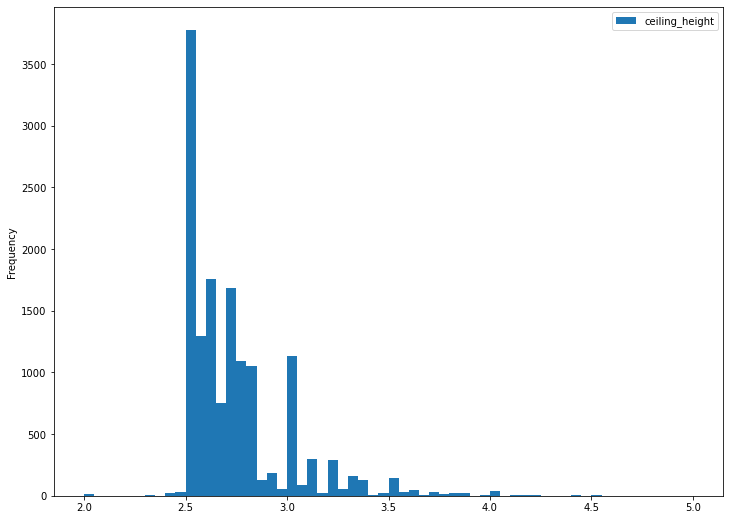

In [1206]:
data.plot(kind='hist', y='ceiling_height', bins=60, range=(2, 5), figsize=(12, 9))

Как видим на графике, число потолков ниже 2.4 метров и боьше 4.5 метров мало, уберём все значения потолков больше 4.5, так как есть даже значения больше 20м, что является одиночным нереально большим значением, логично убрать потолки ниже 2.4 м,так как для обычной квартиры это очень маленькое значение 

<div class="alert alert-warning">
    
**Комментарий ревьюера**
    
Снова хорошая идея, однако выводы и рассуждения нужны не только в конце блоков/мини задач, но и для каждого действия и графика
</div>

<div class='alert alert-info'>
    Сделал промежуточные выводы и описал график
</div>

## Рассмотрим расстояние до центра города cityCenters_nearest 

In [1207]:
complex_function('cityCenters_nearest')

Кол-во пропусков: 5519
Процент пустых даннных по отношению к всем: 23.28790244314106
Кол-во уникальных значений: 7642


<AxesSubplot:ylabel='Frequency'>

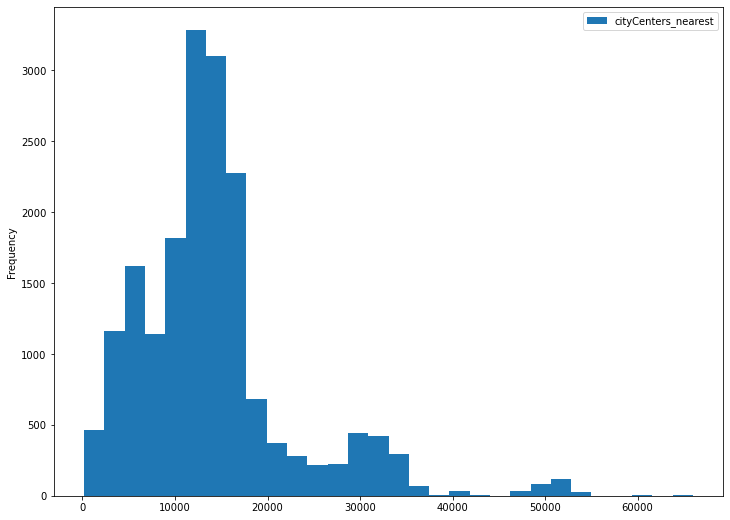

In [1208]:
data.plot(kind='hist', y='cityCenters_nearest', figsize=(12, 9), bins=30)

Видим, что есть как значения близкие к нулю, так и очень большие, рассмотрим минимальное и максимальное значения и решим, можно ли их оставить 

In [1209]:
data['cityCenters_nearest'].describe()

count    18180.000000
mean     14191.277833
std       8608.386210
min        181.000000
25%       9238.000000
50%      13098.500000
75%      16293.000000
max      65968.000000
Name: cityCenters_nearest, dtype: float64

Минимальное значения 181 метр, что вполне может быть, значения середины и медианы близки, но есть разница в тысячц, так как есть группы очень больших значений, так как рассматриваются разные города, то радиус СПБ может быть значительно больше радиуса маленького города, поэтому мы видим большие значения в хвосте, и видим пик примерно в 13_000м, так как практически любой город имеет радиус не меньше 13_000 м

Пустые значения можно заполнить средним по городу, так как, просто их убрать нельзя, а для дальнейшей корреляции они понадобятся 

<div class="alert alert-warning">
    
**Комментарий ревьюера**
    
Снова нет ничего кроме вывода, если дальше будет такое же уже не буду писать,но ты помни, что это касается всей работы)
    
Плюс, еще ведь можно попробовать заполнить и другими способами, почему выбрал именно этот? Чем он лучше других?
</div>

<div class='alert alert-info'>
    Сделал промежуточные выводы и описал график
</div>

## Рассмотрим столбец days_exposition 

In [1210]:
complex_function('days_exposition')

Кол-во пропусков: 3181
Процент пустых даннных по отношению к всем: 13.422507278788135
Кол-во уникальных значений: 1141


In [1211]:
data['days_exposition'].describe()

count    20518.000000
mean       180.888634
std        219.727988
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

<AxesSubplot:ylabel='Frequency'>

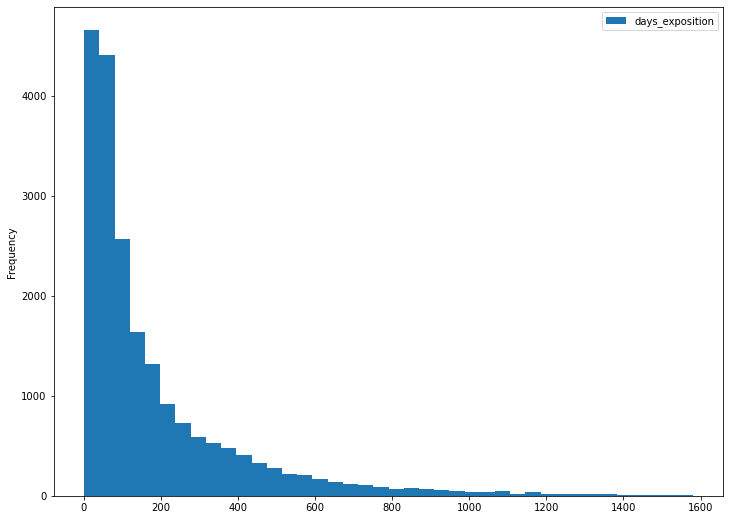

In [1212]:
data.plot(kind='hist', y='days_exposition', figsize=(12,9), bins=40)

Как видим, что со временем объявления убирают, длинный хвост может означать забытое объявление, а малые значения в нуле могут означать, что жилое помещение сдали быстрее, чем за один день, что означает, что квартира имеет высокую привлекательность, рассмотрим кол-во нулевых значений, и большог хвоста

In [1213]:
for index in range(10):
    print(f'Кол-во дней: {index} висело суммарно объявлений {len(data.query("days_exposition < @index"))}')

Кол-во дней: 0 висело суммарно объявлений 0
Кол-во дней: 1 висело суммарно объявлений 0
Кол-во дней: 2 висело суммарно объявлений 1
Кол-во дней: 3 висело суммарно объявлений 4
Кол-во дней: 4 висело суммарно объявлений 162
Кол-во дней: 5 висело суммарно объявлений 338
Кол-во дней: 6 висело суммарно объявлений 490
Кол-во дней: 7 висело суммарно объявлений 614
Кол-во дней: 8 висело суммарно объявлений 848
Кол-во дней: 9 висело суммарно объявлений 987


Как видим, объявления висят не меньше 4 дней до того, как их начнут разбирать, т.е у нас нет объялений которые выставили и через секунду убрали из поиска, убирать значения в нуле не требется, мы сформируем из них по каждому городу, самые популярные признаки, так как это жильё пользуется популярностью у людей 

<AxesSubplot:>

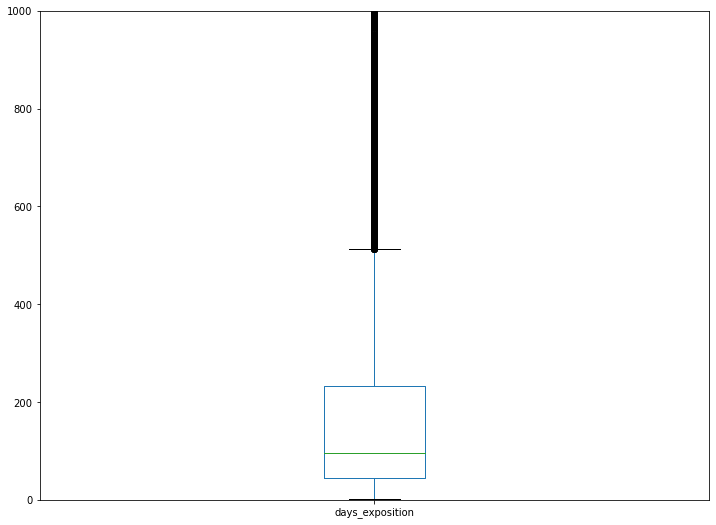

In [1214]:
data.plot(kind='box', y='days_exposition', ylim=(0, 1000), figsize=(12, 9))

Как видим по графику с усами, что ближе к 600 дням остаются непопулярные квартиры, в будущем сосавим отдельную таблтцу для них и сравним их с популярными квартирами, получим основные признаки сдаваемости квартир

<div class="alert alert-warning">
    
**Комментарий ревьюера**
    
Что распределение Пирсона?)Почему?)
</div>

<div class="alert alert-success">
    
**Комментарий ревьюера**
    
Евгений, так дело не пойдет)Очень классно, что ты так подробно всё рассматриваешь и делаешь, но работа должна содержать промежуточные рассуждения и выводы. Почему мы выбрали этот метод, что мы увидели на этом графике, еще какие-то гипотезы, предположения, которые можно было бы проверить. Дальше по работе у тебя выскакивает еще несколько предупреждений, используй библиотеку **warning**, чтобы их скрыть) Что касается оформления, из-за того, что у тебя нет выводов, оно выглядит странно, есть код, графики и почти везде жирный шрифт, лучше жирным выделять названия разделов/задач, а сами выводы писать без выделения)Не расстраивайся, главное не сдать с 1 раза, а правильно и хорошо усвоить материал)
    
Если есть какие-то вопросы, буду рад ответить на них)
</div>

<div class='alert alert-info'>
    Сделал промежуточные выводы и описал график
</div>

## Рассмотрим first_day_exposition 

In [1215]:
complex_function('first_day_exposition')

Кол-во пропусков: 0
Процент пустых даннных по отношению к всем: 0.0
Кол-во уникальных значений: 1491


In [1216]:
data['first_day_exposition'].head(10)

0    2019-03-07T00:00:00
1    2018-12-04T00:00:00
2    2015-08-20T00:00:00
3    2015-07-24T00:00:00
4    2018-06-19T00:00:00
5    2018-09-10T00:00:00
6    2017-11-02T00:00:00
7    2019-04-18T00:00:00
8    2018-05-23T00:00:00
9    2017-02-26T00:00:00
Name: first_day_exposition, dtype: object

В дальнейшем обработаем время и узнаем зависимости между ценой и временем

## Рассмотрим этаж floor 

In [1217]:
complex_function('floor')

Кол-во пропусков: 0
Процент пустых даннных по отношению к всем: 0.0
Кол-во уникальных значений: 33


In [1218]:
data['floor'].describe()

count    23699.000000
mean         5.892358
std          4.885249
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64

<AxesSubplot:ylabel='Frequency'>

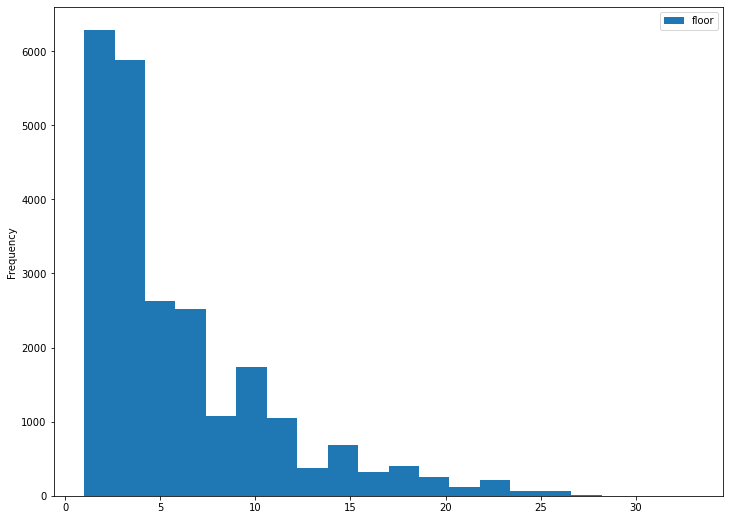

In [1219]:
data.plot(kind='hist', y='floor', figsize=(12, 9), bins=20)

Видим, что нулевого этажа нет, как и этажей больше(33), что возможно. Не будем убирать огромные значения, так как их не больше 1 для каждого из этажей, что видно по уникальным значениям

## Рассмотрим общее число этажей в доме floors_total 

In [1220]:
complex_function('floors_total')

Кол-во пропусков: 86
Процент пустых даннных по отношению к всем: 0.36288450989493226
Кол-во уникальных значений: 36


In [1221]:
data['floors_total'].describe()

count    23613.000000
mean        10.673824
std          6.597173
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

<AxesSubplot:ylabel='Frequency'>

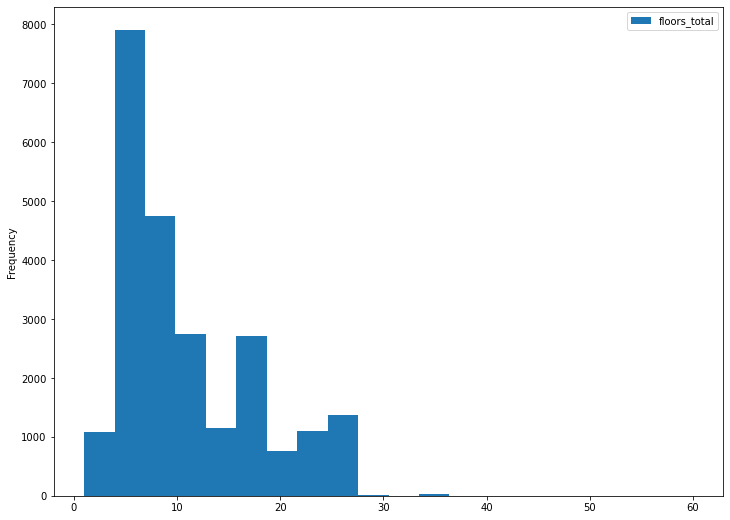

In [1222]:
data.plot(kind='hist', y='floors_total', figsize=(12,9), bins=20)

Как видим в среднем многие живут в десятиэтажках, но если посмотреть, то видим разницу в этаж между медианной и среднем, что вызвано приличным колличеством домов выше 20 этажей, проверим в дальнейшем зависит ли цена от кол-ва этажей.  

## Теперь рассмотрем являются ли дома апартаментами is_apartment 

In [1223]:
complex_function('is_apartment')

Кол-во пропусков: 20924
Процент пустых даннных по отношению к всем: 88.2906451749019
Кол-во уникальных значений: 2


In [1224]:
data['is_apartment'].value_counts()

False    2725
True       50
Name: is_apartment, dtype: int64

Аппартаментов совсем немного их 50 штук, пропущенные значения скорее всего означают, что дом не является аппартаментами, и человек не знал этого и просто пропустил это поле, заполним пропуски на False, а так же составим две таблицы(аппартаменты и нет и сравним их прихнаки)

## Рассмотрим площадь кухни в квадратных метрах

In [1225]:
complex_function('kitchen_area')

Кол-во пропусков: 2278
Процент пустых даннных по отношению к всем: 9.612219924891345
Кол-во уникальных значений: 971


<AxesSubplot:ylabel='Frequency'>

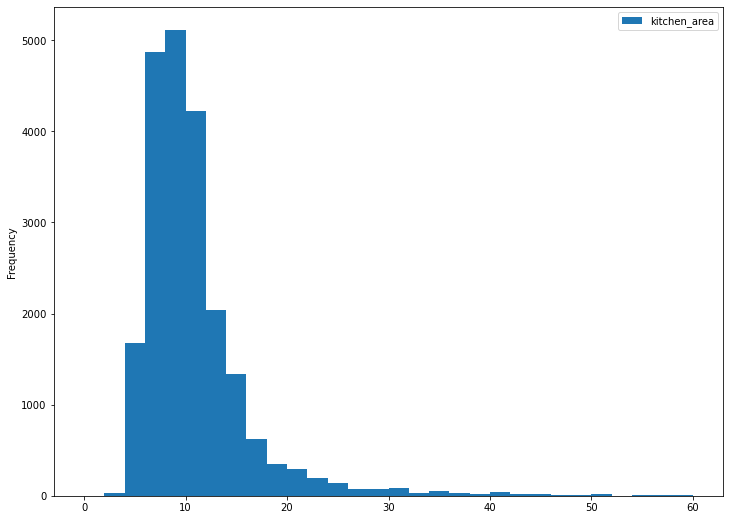

In [1226]:
data.plot(kind='hist', y='kitchen_area', bins=30, figsize=(12,9), range=(0, 60))

Как видим в среднем площадь кухни 10 кв.м, по графику видно, что есть кухни и по 60 м, их удалять не будем, так как они могут оказаться кухнями в дорогих квартирах в центре, в дальнейшем проверим это

In [1227]:
data['kitchen_area'].describe()

count    21421.000000
mean        10.569807
std          5.905438
min          1.300000
25%          7.000000
50%          9.100000
75%         12.000000
max        112.000000
Name: kitchen_area, dtype: float64

Сделаем срезы по общему числу квадратных метров и для каждого среза найдём среднее кв.м заполним таким образом пропуски

## last_price — цена на момент снятия с публикации

In [1228]:
complex_function('last_price')

Кол-во пропусков: 0
Процент пустых даннных по отношению к всем: 0.0
Кол-во уникальных значений: 2978


In [1229]:
data['last_price']

0        13000000.0
1         3350000.0
2         5196000.0
3        64900000.0
4        10000000.0
            ...    
23694     9700000.0
23695     3100000.0
23696     2500000.0
23697    11475000.0
23698     1350000.0
Name: last_price, Length: 23699, dtype: float64

<AxesSubplot:ylabel='Frequency'>

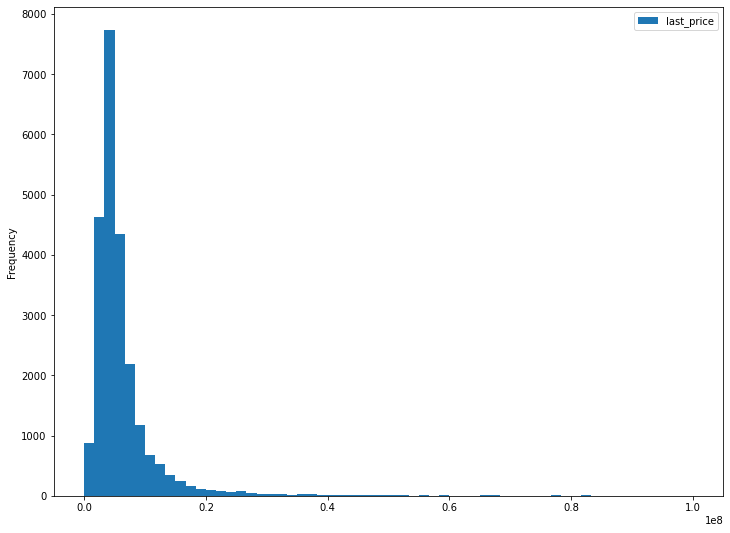

In [1230]:
data.plot(kind='hist', y='last_price', bins=60, figsize=(12, 9), range=(0, 1 * 10** 8))

Видим знаения аренды от 12_000 тысяч, что необычайно мало даже ждя квартиры в регионе, возможно это мошенические объявления, в дальнейшем соберём значения до миллиона, и проверим, что общего у них с остальными значениями

In [1231]:
data['last_price'].describe()

count    2.369900e+04
mean     6.541549e+06
std      1.088701e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.800000e+06
max      7.630000e+08
Name: last_price, dtype: float64

<AxesSubplot:>

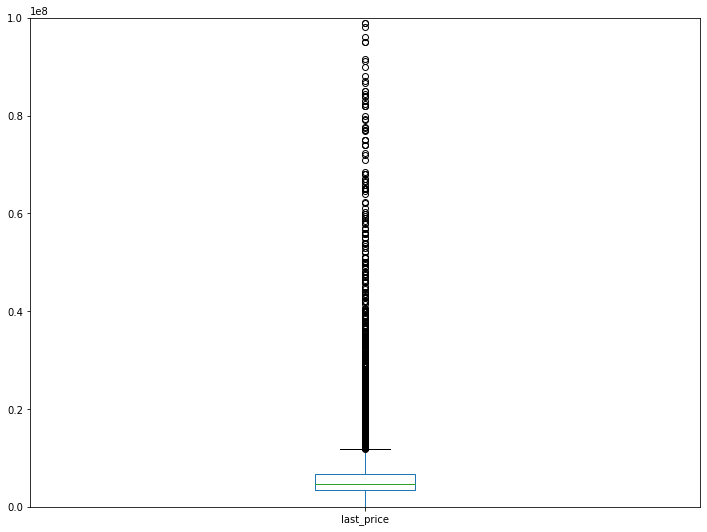

In [1232]:
data.plot(kind='box', y='last_price', ylim=(0, 1 * 10 ** 8), figsize=(12, 9))

Видим, что значения больше 0.6 * 10**8 уже разреженны, возможно это цены на квартиры в центре города, в дальнейшем, если это окажется не так удалим их

In [1233]:
last_price_percent = data.query('last_price > 0.6 * 10 ** 8')
len(last_price_percent) / len(data) * 100

0.4261783197603275

Процент огромных значений

## Рассмотрим жилую площадь

In [1234]:
complex_function('living_area')

Кол-во пропусков: 1903
Процент пустых даннных по отношению к всем: 8.029874678256467
Кол-во уникальных значений: 1782


<AxesSubplot:ylabel='Frequency'>

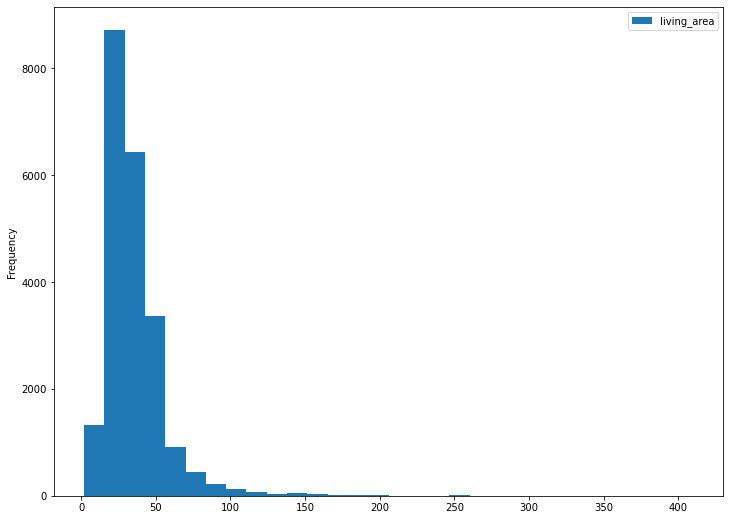

In [1235]:
data.plot(y='living_area', kind='hist', figsize=(12,9), bins=30)

Видими, что медиана в районе 30 м.кв, что логично для однкомнатной квартиры, но группа сверхмалых значений , в районе от 2 до 10 слишком мала даже для общежития, возможо мошенические действия после анализа данной группы примем решения оставить или удалить их

In [1236]:
len(data.query('living_area < 10'))

25

Кол-во сверхмалых значений

In [1237]:
data['living_area'].describe()

count    21796.000000
mean        34.457852
std         22.030445
min          2.000000
25%         18.600000
50%         30.000000
75%         42.300000
max        409.700000
Name: living_area, dtype: float64

## Рассмотрим названия населённых пунктов locality_name 

In [1238]:
complex_function('locality_name')

Кол-во пропусков: 49
Процент пустых даннных по отношению к всем: 0.20675977889362418
Кол-во уникальных значений: 364


В данном столбце все значения приведём к нижнему регистру, пустые значения удалим, так как мы не сможем точно определить город

## Рассмотрим свободную планировку

In [1239]:
complex_function('open_plan')

Кол-во пропусков: 0
Процент пустых даннных по отношению к всем: 0.0
Кол-во уникальных значений: 2


In [1240]:
open_plan = data['open_plan'].value_counts()

In [1241]:
print(open_plan)
print(f'Отношение свободной планировки ко всем: {open_plan[1] / (open_plan[1] + open_plan[0]) * 100}')

False    23632
True        67
Name: open_plan, dtype: int64
Отношение свободной планировки ко всем: 0.2827123507320984


Квартир со свободной планировкой мало, рассмотрим как зависит наличие свободной планировки от общей цены

## Рассмотрим число парков в 3 км parks_around3000  

In [1242]:
complex_function('parks_around3000')

Кол-во пропусков: 5518
Процент пустых даннных по отношению к всем: 23.2836828558167
Кол-во уникальных значений: 4


In [1243]:
data['parks_around3000'].value_counts()

0.0    10106
1.0     5681
2.0     1747
3.0      647
Name: parks_around3000, dtype: int64

<AxesSubplot:ylabel='Frequency'>

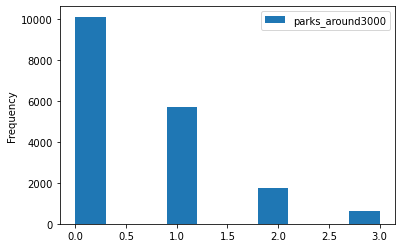

In [1244]:
data.plot(kind='hist', y='parks_around3000')

Как видим, что много квартир не имеют рядом парка, что для районых городов вполне логично, видим, что нет огрмного значения числа парков рядом. Для пустых значений преобразуем их в (0), так как это означет, что рядом парка нет

## Рассмотрим расстояние до ближайшего парка parks_nearest 

In [1245]:
complex_function('parks_nearest')

Кол-во пропусков: 15620
Процент пустых даннных по отношению к всем: 65.90995400649817
Кол-во уникальных значений: 995


<AxesSubplot:ylabel='Frequency'>

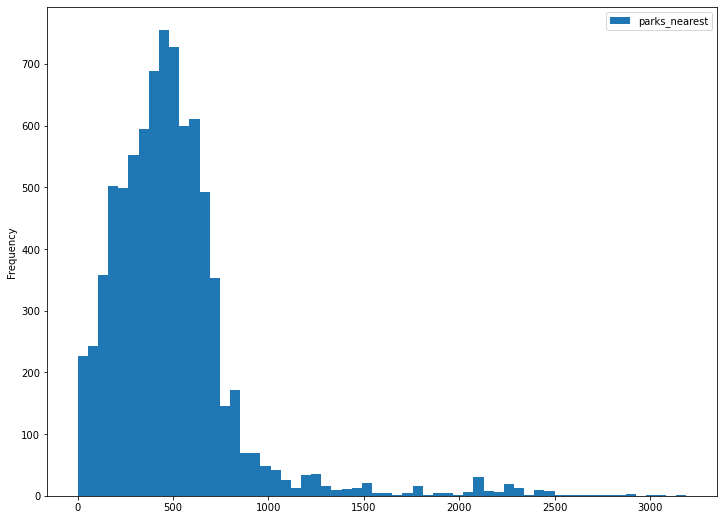

In [1246]:
data.plot(kind='hist', y='parks_nearest', bins=60, figsize=(12,9))

Ранее мы рассматривали парки в радиусе до 3 км, на данном графике видим, что совсем небольшле число парков более 3 км, оставим их, так же в дальнейшем рассмотрим сверхмалые значения в пределах  до 5 метров

In [1247]:
data['parks_nearest'].describe()

count    8079.000000
mean      490.804555
std       342.317995
min         1.000000
25%       288.000000
50%       455.000000
75%       612.000000
max      3190.000000
Name: parks_nearest, dtype: float64

In [1248]:
for index in range(20):
    print(f'Кол-во парков до {index} метров: {len(data.query("parks_nearest < @index"))}')

Кол-во парков до 0 метров: 0
Кол-во парков до 1 метров: 0
Кол-во парков до 2 метров: 1
Кол-во парков до 3 метров: 1
Кол-во парков до 4 метров: 2
Кол-во парков до 5 метров: 3
Кол-во парков до 6 метров: 3
Кол-во парков до 7 метров: 3
Кол-во парков до 8 метров: 4
Кол-во парков до 9 метров: 4
Кол-во парков до 10 метров: 6
Кол-во парков до 11 метров: 13
Кол-во парков до 12 метров: 18
Кол-во парков до 13 метров: 19
Кол-во парков до 14 метров: 25
Кол-во парков до 15 метров: 26
Кол-во парков до 16 метров: 31
Кол-во парков до 17 метров: 36
Кол-во парков до 18 метров: 42
Кол-во парков до 19 метров: 50


Как видим, что парков до 9 метров, не более 4, после 10 метров их кол-во начинает возрастать, возможно, что если парк очень близко с домом, то цена может меняться, в дальнейшем рассмотрим это

<AxesSubplot:>

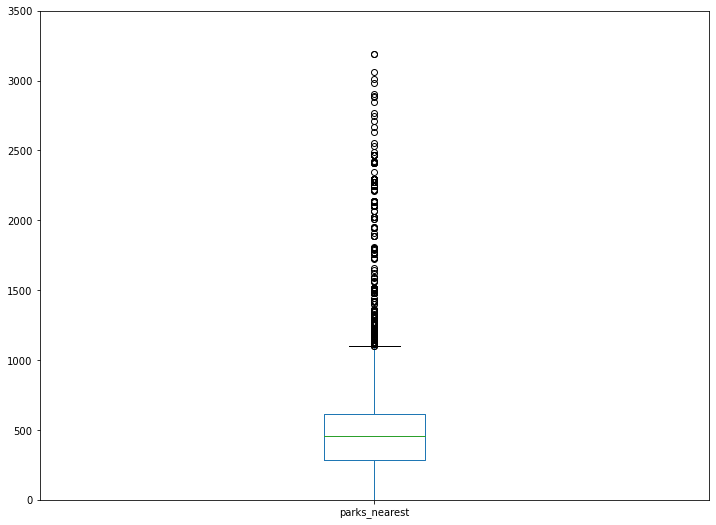

In [1249]:
data.plot(kind='box', y='parks_nearest', ylim=(0, 3500), figsize=(12, 9))

Расстояние до ближайшего парка, если оно пустое заменим расстоянием до парка в 3км

## Рассмотрим число водоёмов в радиусе 3 км ponds_around3000 

In [1250]:
complex_function('ponds_around3000')

Кол-во пропусков: 5518
Процент пустых даннных по отношению к всем: 23.2836828558167
Кол-во уникальных значений: 4


In [1251]:
data['ponds_around3000'].value_counts()

0.0    9071
1.0    5717
2.0    1892
3.0    1501
Name: ponds_around3000, dtype: int64

<AxesSubplot:ylabel='Frequency'>

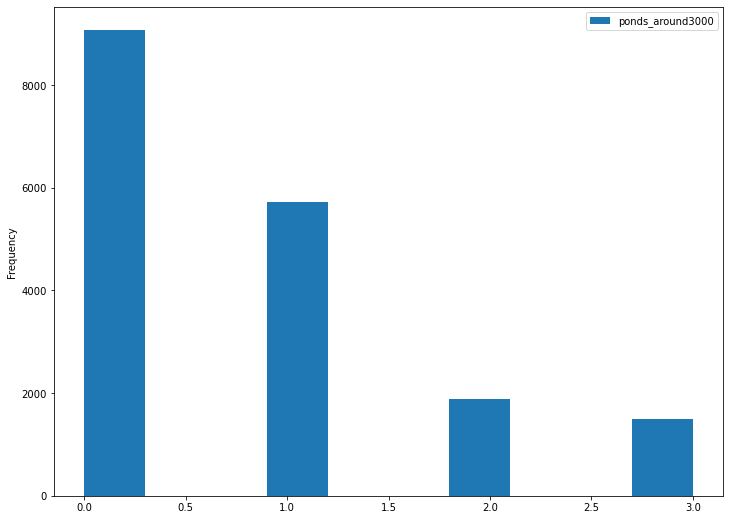

In [1252]:
data.plot(kind='hist', y='ponds_around3000', figsize=(12, 9))

Проведём аналогичные рассуждения по водоёма, как и по паркам, заменим пропуски нудями

## Расстояние до ближайшего водоёма ponds_nearest 

In [1253]:
complex_function('ponds_nearest')

Кол-во пропусков: 14589
Процент пустых даннных по отношению к всем: 61.55955947508333
Кол-во уникальных значений: 1096


<AxesSubplot:ylabel='Frequency'>

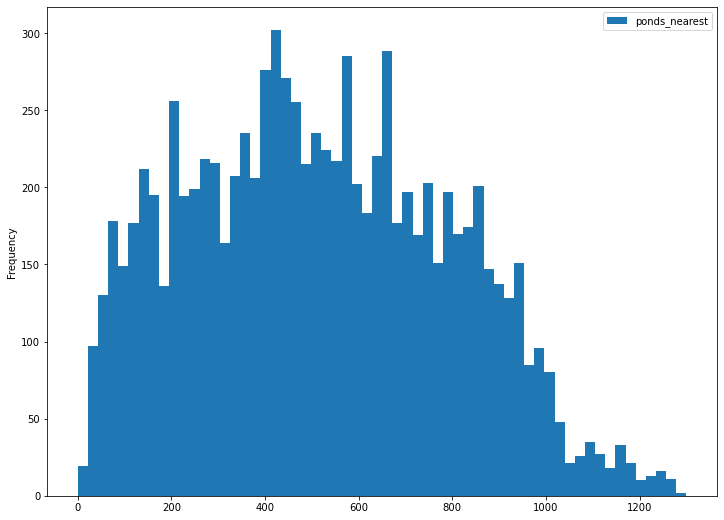

In [1254]:
data.plot(kind='hist', y='ponds_nearest', bins=60,range=(0, 1300), figsize=(12,9))

In [1255]:
data['ponds_nearest'].describe()

count    9110.000000
mean      517.980900
std       277.720643
min        13.000000
25%       294.000000
50%       502.000000
75%       729.000000
max      1344.000000
Name: ponds_nearest, dtype: float64

Проведйм рассуждения аналогичные по паркам, заменим пустые знакчения на расстояние радиуса 3км до водоёма

## Рассмотрим число комнат rooms 

In [1256]:
complex_function('rooms')

Кол-во пропусков: 0
Процент пустых даннных по отношению к всем: 0.0
Кол-во уникальных значений: 17


In [1257]:
data['rooms'].value_counts().sort_values()

15       1
12       1
19       1
16       1
11       2
14       2
10       3
9        8
8       12
7       59
6      105
0      197
5      326
4     1180
3     5814
2     7940
1     8047
Name: rooms, dtype: int64

<AxesSubplot:ylabel='Frequency'>

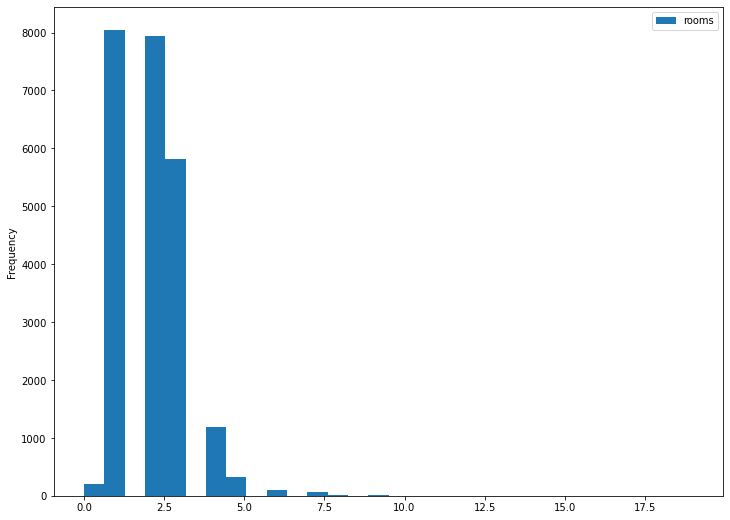

In [1258]:
data.plot(kind='hist', y='rooms', bins=30, figsize=(12,9))

Как видим, чтов медиана и среднее указывают, что обычно продаются квартиры с двумя комнатами, но есть и огромные значения по 19 комнат, возможно это целый этаж под офис

In [1259]:
data['rooms'].describe()

count    23699.000000
mean         2.070636
std          1.078405
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

Пустые значения сравним, на тип квартиры, если это аппартаменты или студия, то ноль заменим на 1, иначе удалим строку

## Рассмотрим, является ли квартира студией studio

In [1260]:
complex_function('studio')

Кол-во пропусков: 0
Процент пустых даннных по отношению к всем: 0.0
Кол-во уникальных значений: 2


In [1261]:
data['studio'].value_counts()

False    23550
True       149
Name: studio, dtype: int64

Квартир студий всего 149

## Рассмотрим площадь квартиры в квадратных метрах total_area 

In [1262]:
complex_function('total_area')

Кол-во пропусков: 0
Процент пустых даннных по отношению к всем: 0.0
Кол-во уникальных значений: 2182


<AxesSubplot:ylabel='Frequency'>

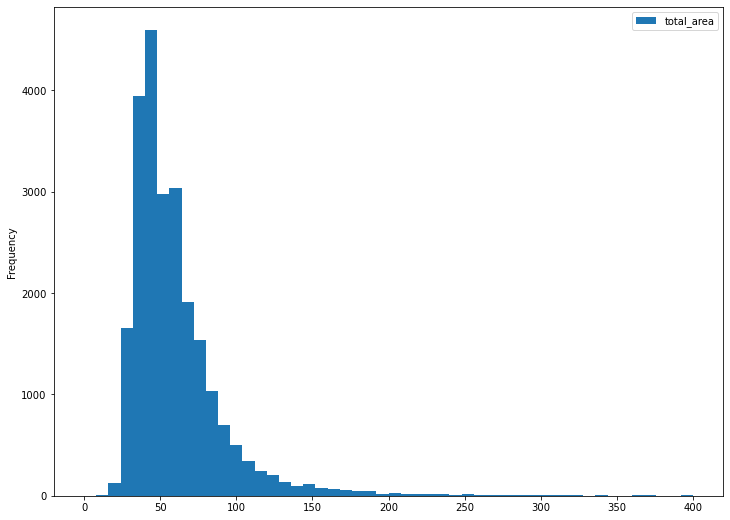

In [1263]:
data.plot(kind='hist', y='total_area', figsize=(12,9), bins=50, range=(0, 400))

Видим пик в пределах 50, как медиана, но среднее 60 из-за огромных значений справа, значения более 70 рассмотрим детальнее позднее, либо часть обрежем или оставим, как помещение под офис или в центре города

In [1264]:
data['total_area'].describe()

count    23699.000000
mean        60.348651
std         35.654083
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64

## Рассмотрим число фотографий квартиры в объявлении

In [1265]:
complex_function('total_images')

Кол-во пропусков: 0
Процент пустых даннных по отношению к всем: 0.0
Кол-во уникальных значений: 38


<AxesSubplot:ylabel='Frequency'>

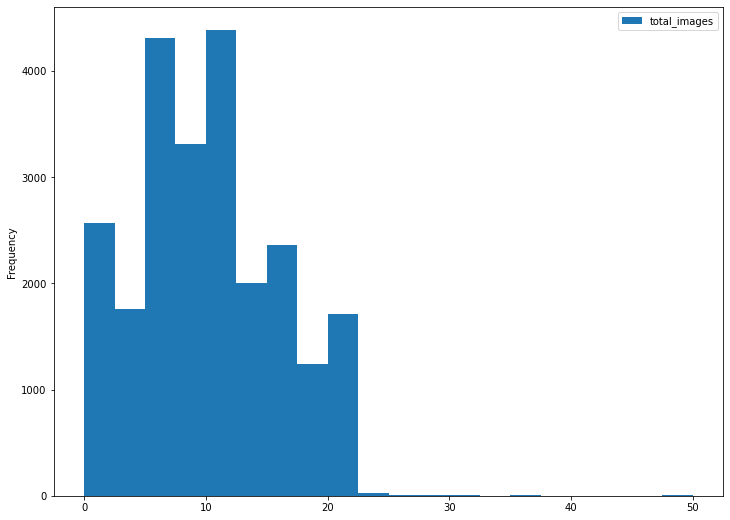

In [1266]:
data.plot(kind='hist', y='total_images', bins=20, figsize=(12,9))

Видим, что число фотографий, в среднем равно 9, как по медиане, так и по среднему, есть небольшое число огромного числа фото, но они в целом не изменят данные, поэтому не удаляем их

In [1267]:
data['total_images'].describe()

count    23699.000000
mean         9.858475
std          5.682529
min          0.000000
25%          6.000000
50%          9.000000
75%         14.000000
max         50.000000
Name: total_images, dtype: float64

### Вывод: ### После просмотра и первоначального анализа данных можно сказать, что есть проблемы с пропусками, а так же с неверными типами данных, есть пустые значения, эти проблемы будут исправлены, как описано выше

### Шаг 2. Предобработка данных

Начнём убирать пропуски и выбросы данных, так же проверим на дубликаты данные, преобразуем наши типы данных и преведём время к стандартному формату

## Обработаем  расстояние до ближайшего аэропорта в метрах (м)  airports_nearest 

<AxesSubplot:>

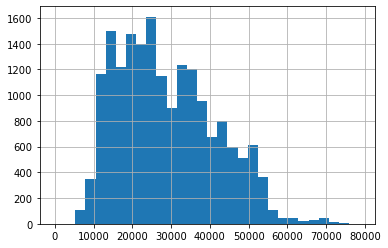

In [1268]:
data = data.loc[(data['airports_nearest'] < 80000) | (data['airports_nearest'].isna())]
data['airports_nearest'].hist(bins=30)

Удалили 7 аэропортов, с расстоянием 80_000м

In [1269]:
data['airports_nearest'] = data['airports_nearest'].fillna(0)

In [1270]:
complex_function('airports_nearest')

Кол-во пропусков: 0
Процент пустых даннных по отношению к всем: 0.0
Кол-во уникальных значений: 8268


In [1271]:
data['airports_nearest'] = data['airports_nearest'].astype('int64')

## Обработаем locality_name — название населённого пункта

In [1272]:
data = data.loc[~data['locality_name'].isna()]
data['locality_name'] = data['locality_name'].str.lower()

Привели все имена к малому регистру

## Обработаем число балконов balcony

In [1273]:
complex_function('balcony')

Кол-во пропусков: 11511
Процент пустых даннных по отношению к всем: 48.68671488389798
Кол-во уникальных значений: 6


In [1274]:
data.loc[data['balcony'].isna(), 'balcony'] = 0.0

In [1275]:
data['balcony'].value_counts()

0.0    15236
1.0     4182
2.0     3658
5.0      304
4.0      182
3.0       81
Name: balcony, dtype: int64

In [1276]:
data['balcony'] = data['balcony'].astype('int64')

## Обработаем высоту потолков ceiling_height 

In [1277]:
data = data.loc[(data['ceiling_height'] > 2.4) & (data['ceiling_height'] < 4.5) | (data['ceiling_height'].isna())]

In [1278]:
fill_na_of_city('ceiling_height')

In [1279]:
data['ceiling_height']

0        2.70
1        2.63
2        2.70
3        2.70
4        3.03
         ... 
23694    3.70
23695    2.50
23696    2.65
23697    3.00
23698    2.50
Name: ceiling_height, Length: 23550, dtype: float64

Обработали потолки выше 4.5 и ниже 2.4 метров

Обработали медианную  высоту потолков по городу

##  Обработаем cityCenters_nearest — расстояние до центра города (м)

In [1280]:
data = data.loc[(data['cityCenters_nearest'] < 60_000) | (data['cityCenters_nearest'].isna())]

In [1281]:
center_median_global = data['cityCenters_nearest'].median()

глобальная медиана по всем городам

In [1282]:
fill_na_of_city('cityCenters_nearest')

Как и описывалось ранее найдём среднее по городам и заполним nan,если среднего нет(все квартиры в городе с пустым значением), то заполним глобальным среднем

In [1283]:
data['cityCenters_nearest'].value_counts(dropna=False).count()

7605

In [1284]:
data['cityCenters_nearest'] = data['cityCenters_nearest'].astype('int64')

Преобразуем полученные данные к типу int

## Обработаем days_exposition — сколько дней было размещено объявление (от публикации до снятия)

In [1285]:
data = data.loc[(data['days_exposition'] < 1200) | (data['days_exposition'].isna())]

In [1286]:
data['days_exposition'].describe()

count    20295.000000
mean       175.575363
std        206.134386
min          1.000000
25%         45.000000
50%         95.000000
75%        228.000000
max       1199.000000
Name: days_exposition, dtype: float64

In [1287]:
fill_na_of_city('days_exposition')

Заполним пропуски средним по городу, если это возможно

<AxesSubplot:ylabel='Frequency'>

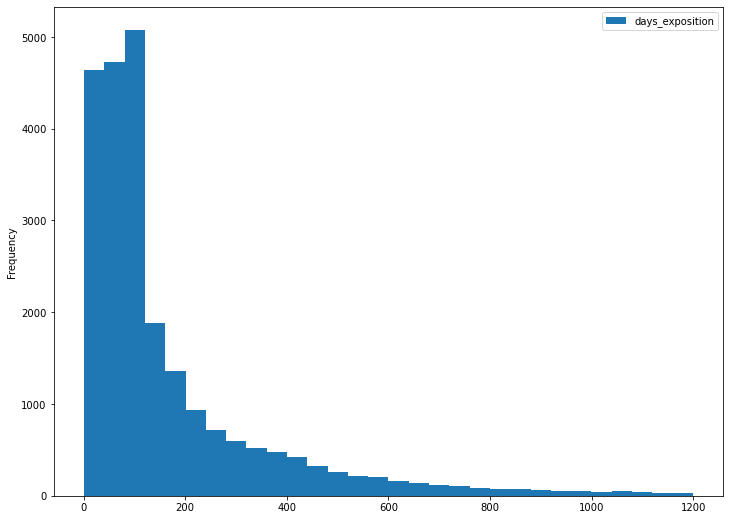

In [1288]:
data.plot(kind='hist', y='days_exposition', bins=30, figsize=(12,9))

Как видим, что распределение не поменяло форму, хотя мы заполнили все пропуски в данных

## Обработаем first_day_exposition — дата публикации

In [1289]:
data['time_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

Перевели дату в читаемый и удобный для анализа вид

## Обработаем floor — этаж

In [1290]:
data = data[~data['floor'].isna()]

Уберём пустые значения

In [1291]:
data['floor'] = data['floor'].astype('int64')

Преведём к типу int

## Обработаем floors_total — всего этажей в доме

In [1292]:
data = data.loc[~data['floors_total'].isna()]

In [1293]:
data['floors_total'] = data['floors_total'].astype('int64')

Привели к типу int, так как число этажей не может быть дробным

## Обработаем is_apartment 

In [1294]:
data['is_apartment'] = data['is_apartment'].fillna(False)

Заполнили пропуски в домах не являющимися аппартаментами

## Обработаем kitchen_area — площадь кухни в квадратных метрах (м²)

In [1295]:
fill_na_of_city('kitchen_area')

Обработали пропуски в данных

In [1296]:
len(data.query('kitchen_area <= 5'))

455

In [1297]:
data = data.query('kitchen_area > 5')

Убрали излишне маленькие кухни

## Обработаем studio — квартира-студия (булев тип)

In [1298]:
complex_function('studio')

Кол-во пропусков: 0
Процент пустых даннных по отношению к всем: 0.0
Кол-во уникальных значений: 2


In [1299]:
data['studio'].value_counts()

False    22772
True       145
Name: studio, dtype: int64

Данный столбец в обработке не нуждатся

## Обработаем rooms — число комнат

In [1300]:
print(f'Число нулевых комнат {len(data.query("rooms == 0"))}')

Число нулевых комнат 192


In [1301]:
data.loc[((data['studio']==True) | (data['is_apartment']==True)) & (data['rooms'] == 0)] = 1

In [1302]:
print(f'Число нулевых комнат {len(data.query("rooms == 0"))}')

Число нулевых комнат 58


Убрали комнаты которые были аппартаментами или студиями и прирвняли их значения к 1, остальные данные удалим

In [1303]:
data = data.loc[~(data['rooms'] == 0)]

Удалили ненужные помещения

## Обработаем last_price — цена на момент снятия с публикации

In [1304]:
data['last_price'] = data['last_price'].astype('int64')

Превели к типу данных int, дальнейший анализ позднее

## Обработаем living_area — жилая площадь в квадратных метрах(м²)

In [1305]:
fill_na_of_city('living_area')

<AxesSubplot:xlabel='living_area', ylabel='rooms'>

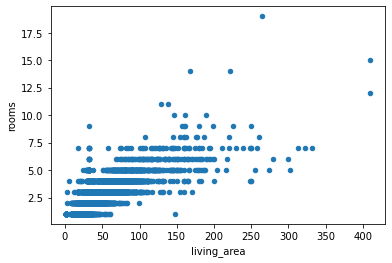

In [1306]:
data.plot(kind='scatter', x='living_area', y='rooms')

После обработки заметили, что для маленькой площади бывает очень много комнат в дальнейшем рассмотрим это

## Обработаем parks_around3000 — число парков в радиусе 3 км

In [1307]:
data['parks_around3000'] = data['parks_around3000'].fillna(value=0)

In [1308]:
data['parks_around3000'] = pd.to_numeric(data['parks_around3000'], errors='coerce').astype('int64')

## Обработаем parks_nearest — расстояние до ближайшего парка (м)

In [1309]:
def parks_near(row):
    if np.isnan(row['parks_nearest']):
        return row['parks_around3000']
    else:
        return row['parks_nearest']

In [1310]:
data['parks_nearest'] = data[['parks_nearest', 'parks_around3000']].apply(parks_near, axis=1)

In [1311]:
data['parks_nearest'].isna().sum()

0

In [1312]:
data['parks_nearest'] = pd.to_numeric(data['parks_nearest'], errors='coerce').astype('int64')

In [1313]:
complex_function('parks_nearest')

Кол-во пропусков: 0
Процент пустых даннных по отношению к всем: 0.0
Кол-во уникальных значений: 993


## Обработаем ponds_around3000 — число водоёмов в радиусе 3 км

In [1314]:
data['ponds_around3000'] = data['ponds_around3000'].fillna(value=0) 

In [1315]:
data['ponds_around3000'] = data['ponds_around3000'].astype('int64')

Заполнили пустые водоёмы нулями

## Обработаем ponds_nearest — расстояние до ближайшего водоёма (м)

In [1316]:
def ponds_nearest(row):
    if np.isnan(row['ponds_nearest']):
        return row['ponds_around3000']
    else:
        return row['ponds_nearest']   

In [1317]:
data['ponds_nearest'] = data[['ponds_nearest', 'ponds_around3000']].apply(ponds_nearest, axis=1)

In [1318]:
data['ponds_nearest'] = data['ponds_nearest'].astype('int64')

Заполнили расстояние до ближайшего водоёма

## Обработаем total_area — площадь квартиры в квадратных метрах (м²)

In [1319]:
data['total_area'] = data['total_area'].astype('int64')

Данные о площадях квартир не удаляем, потом рассмотрим на мошенические действия

## Обработаем total_images — число фотографий квартиры в объявлении

In [1320]:
data = data.query('total_images < 50')

Кол-во фотографий не влияют сильно на сдвиг, оставим  все объявления меньшие 50 для дальнейшего анализа 

# Вывод:

### Мы обработали пропуски и изменили тип данных на целочисленный где это было нужно, так же преобразовали нашу дату к понятному формату, удалили хвосты излишков и слишком малые значения в начале, которые не могли быть правдивыми

### Шаг 3. Посчитайте и добавьте в таблицу

## Посчитаем цену за квадратный метр и построим гистограмму

Ранее мы заметили, что квартиры с площадью менее 15 кв.м подозрительны, так как слишком малы. Соберём их воедино и сравним с группой квартир больше 15 кв.м до 

In [1321]:
sq_small_room = data.query('total_area <= 15')

In [1322]:
sq_large_room = data.query('total_area > 15 and total_area < 60')

In [1323]:
compare_data(sq_small_room, sq_large_room)

Среднее значение floor для 1.0283687943262412 сравниваем с 5.942243164132219 их отношение : 0.17306070551497196
Среднее значение floors_total для 1.2553191489361701 сравниваем с 10.803241236524595 их отношение : 0.11619838171270963
Среднее значение ceiling_height для 1.0861702127659574 сравниваем с 2.6512290283429505 их отношение : 0.40968554627090314
Среднее значение balcony для 0.950354609929078 сравниваем с 0.5583636753052046 их отношение : 1.702035164464467
Среднее значение living_area для 2.198581560283688 сравниваем с 24.147993253516205 их отношение : 0.0910461394121663
Среднее значение rooms для 1.0 сравниваем с 1.5308774184336402 их отношение : 0.6532201650888402
Среднее значение last_price для 103447.75886524822 сравниваем с 4001000.29699436 их отношение : 0.025855473928097547


Как видим, что жилая площадь равая 1, просто невозможна, данные квартиры с такой малой площадью надо откинуть, и если человек указывает площадь до 15кв.м, скорее всего это мшенечиске действия

In [1324]:
data = data.query('total_area > 15')

In [1325]:
data['metre_sq_price'] = data['last_price'] // (data['total_area'])

In [1326]:
data['metre_sq_price'] = data['metre_sq_price'].astype('int64')

<AxesSubplot:ylabel='Frequency'>

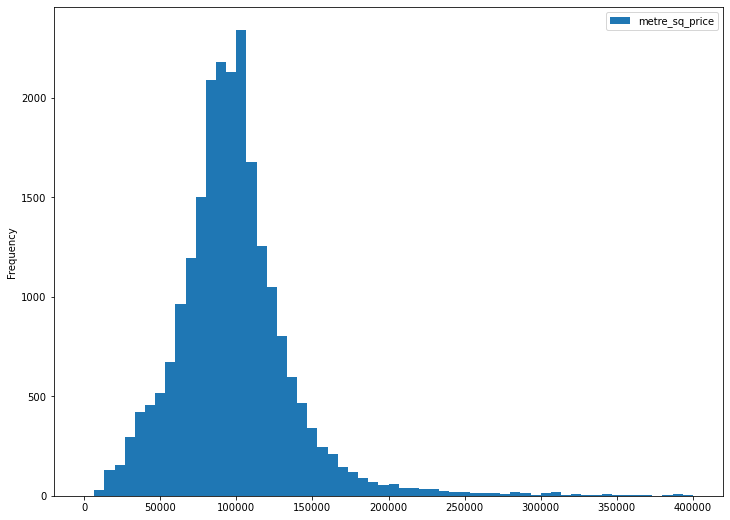

In [1327]:
data.plot(kind='hist', y='metre_sq_price', figsize=(12,9), bins=60, range=(0, 400_000))

Как видим на графике, есть группа квартир с малой суммой за кв.м, рассмотрим их подробнее, как мошенеческие квартиры

In [1328]:
data['metre_sq_price'].describe()

count    2.271500e+04
mean     9.999656e+04
std      5.041136e+04
min      1.110000e+02
25%      7.727200e+04
50%      9.554400e+04
75%      1.148640e+05
max      1.907500e+06
Name: metre_sq_price, dtype: float64

Убрав сверхмалые квартиры по площади, мы всёравно получили квартиры с уеной по 100 р кв.м, разберёмся с этим

<AxesSubplot:>

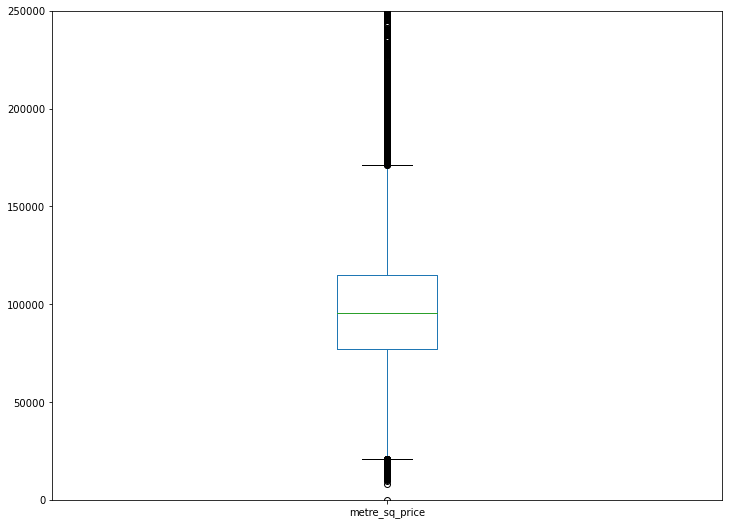

In [1329]:
data.plot(kind='box', y='metre_sq_price', figsize=(12,9), ylim=(0, 0.25 * 10 ** 6))

Как видим, то есть ряд квартир с малой стоимостью за метр, уберём их, так как квартира за 100р кв.м не может существовать

In [1330]:
len(data.query('metre_sq_price < 20000'))

160

In [1331]:
data = data.query('metre_sq_price >= 20_000')

<AxesSubplot:>

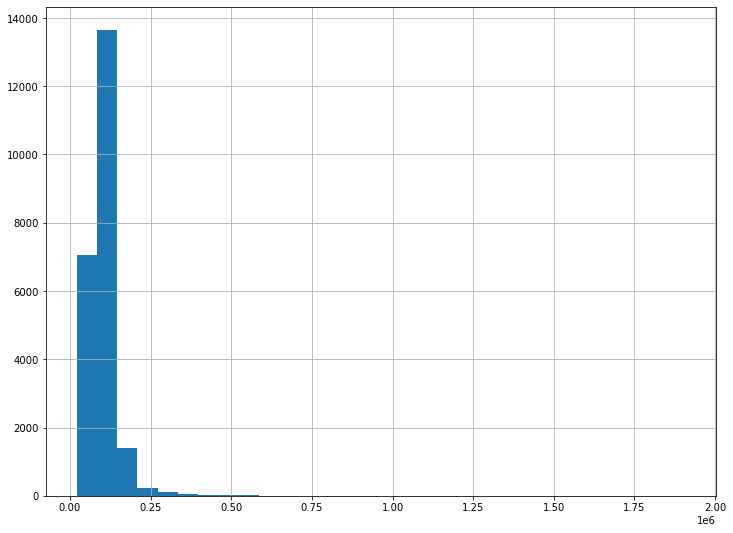

In [1332]:
data['metre_sq_price'].hist(bins=30, figsize=(12,9))

Убрали квартиры со слишком малой площадью, а так же со слишком малой ценой за кв.м. К квартирам с ценой за кв.м менее 20_000 и площадью менее 15 кв.м надо относится с осторожностью возможно это ненастоящие объявления

## Добавим в таблицу день недели, месяц и год публикации объявления

Это было сделано ранее при обработке результатов

## Добавим этаж квартиры; варианты — первый, последний, другой;

In [1333]:
def fllor_name(row):
    home_floor = row['floors_total']
    person_floor = row['floor']
    
    if person_floor == 1:
        return 'первый'
    elif home_floor == person_floor:
        return 'последний'
    else:
        return 'другой'

In [1334]:
data['floor_name'] = data[['floor', 'floors_total']].apply(fllor_name, axis=1)

In [1335]:
data['floor_name'].value_counts(dropna=False)

другой       16731
последний     3115
первый        2709
Name: floor_name, dtype: int64

## Добавим соотношение жилой и общей площади, а также отношение площади кухни к общей.

In [1336]:
data['life_to_all'] = data['living_area'] / data['total_area'] * 100

In [1337]:
data['kitchen_area_to_all'] = data['kitchen_area'] / data['total_area'] * 100

In [1338]:
data[['life_to_all', 'kitchen_area_to_all']] = data[['life_to_all', 'kitchen_area_to_all'] ].astype('int64')

Добавили отношение площадей, а так же  перевели их к типу int

<AxesSubplot:ylabel='Frequency'>

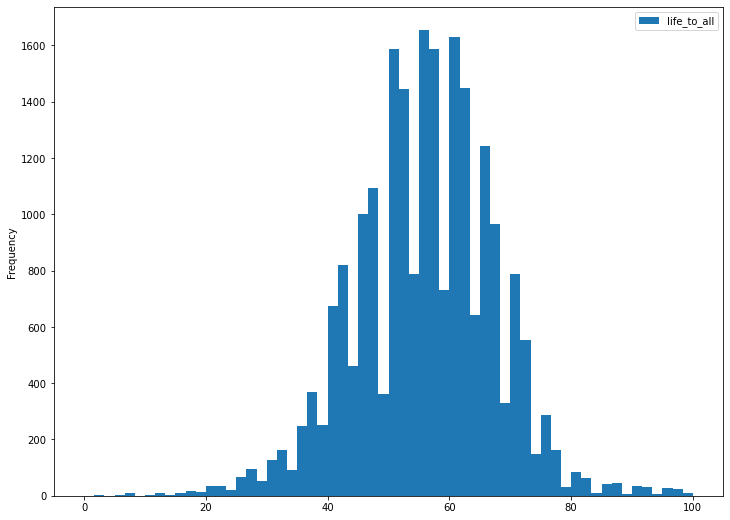

In [1339]:
data.plot(kind='hist', y='life_to_all', figsize=(12,9), bins=60, range=(0,100))

Видим, что есть небольшие значени площади меньше 20 рассмотрим эту группу квартир

In [1340]:
live_area_small = data.query('life_to_all < 20')

In [1341]:
live_area_much = data.query('life_to_all >= 20')

In [1342]:
compare_data(live_area_small, live_area_much)

Среднее значение floor для 6.101449275362318 сравниваем с 5.930445610602153 их отношение : 1.0288348761608157
Среднее значение floors_total для 9.391304347826088 сравниваем с 10.784221293249132 их отношение : 0.8708375034648999
Среднее значение ceiling_height для 2.8914492753623184 сравниваем с 2.7031884283551064 их отношение : 1.0696439970785792
Среднее значение balcony для 0.34782608695652173 сравниваем с 0.5950813839722494 их отношение : 0.5845017107319593
Среднее значение living_area для 26.716666666666672 сравниваем с 34.260439896379665 их отношение : 0.7798109641169507
Среднее значение rooms для 3.869565217391304 сравниваем с 2.0811616116694833 их отношение : 1.8593295185217185
Среднее значение last_price для 36867464.666666664 сравниваем с 6539677.14355599 их отношение : 5.637505316756318


Увидели, что средние параметры близки, но странно, что кол-во квартир, где площадь мала практически в 2 раза больше, где жилая площадь больше, это могут быть помещения под офисы, проверим 

In [1343]:
len(live_area_small) / len(live_area_small.query('is_apartment == True or studio == True'))

69.0

Это жилые помещения, теория не подтвердилась, удалим все помещения меньше 20 кв.м, где комнат больше 2

In [1344]:
data = data.query('not (life_to_all < 20 and rooms > 2)')

<AxesSubplot:ylabel='Frequency'>

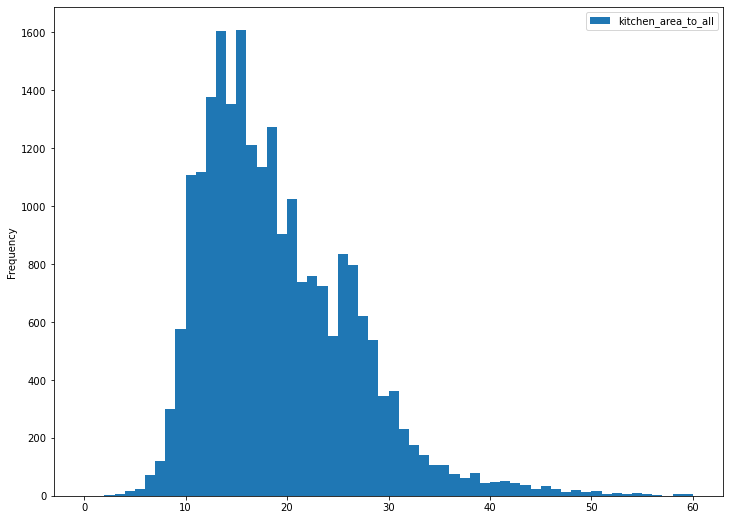

In [1345]:
data.plot(kind='hist', y='kitchen_area_to_all', figsize=(12,9), bins=60, range=(0,60))

Рассмотрим малые кухни, и сравним с сегментом до 40 кв.м

In [1346]:
small_ch = data.query('kitchen_area_to_all <= 10')

In [1347]:
large_ch = data.query('kitchen_area_to_all > 10')

In [1348]:
compare_data(small_ch, large_ch)

Среднее значение floor для 4.275675675675676 сравниваем с 6.111576767577162 их отношение : 0.6996027110972051
Среднее значение floors_total для 7.371171171171171 сравниваем с 11.15747953850705 их отношение : 0.6606484148800407
Среднее значение ceiling_height для 2.776202702702688 сравниваем с 2.6952581106397107 их отношение : 1.0300322227928536
Среднее значение balcony для 0.5171171171171172 сравниваем с 0.6034414751996845 их отношение : 0.8569465944414878
Среднее значение living_area для 59.80748648738739 сравниваем с 31.447827211714557 их отношение : 1.9018002765262156
Среднее значение rooms для 3.5558558558558557 сравниваем с 1.9193373434572527 их отношение : 1.852647669247546
Среднее значение last_price для 11284572.527027028 сравниваем с 6025477.61354896 их отношение : 1.8728096344848093


Полученные данные логичны, чем меньше кухня тем больше места для комнат и их число

## Вывод: Получили значения этажа и стоимости за квадратный метр, обычно  процент жилой площади около 60%, когда как площади кухни 15%

### Шаг 4. Проведите исследовательский анализ данных и выполните инструкции:

## 1) Изучим следующие параметры: площадь, цена, число комнат, высота потолков. Постройте гистограммы для каждого параметра.

In [1349]:
col_name = ['last_price', 'total_area', 'rooms', 'ceiling_height']

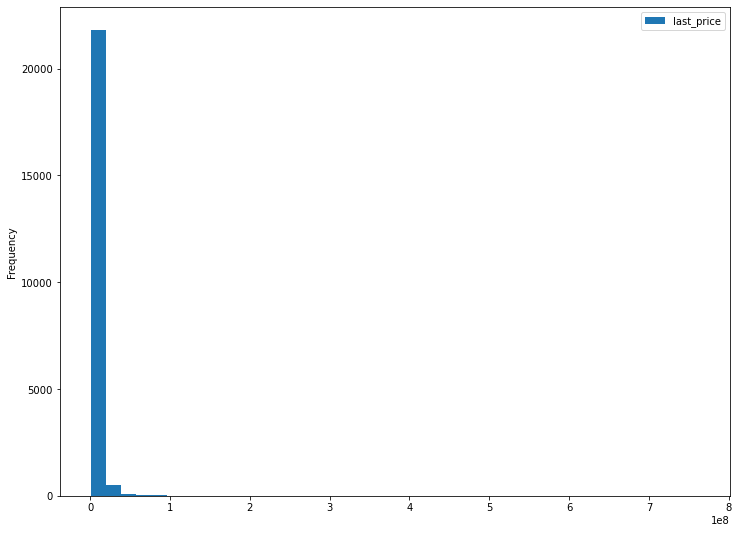

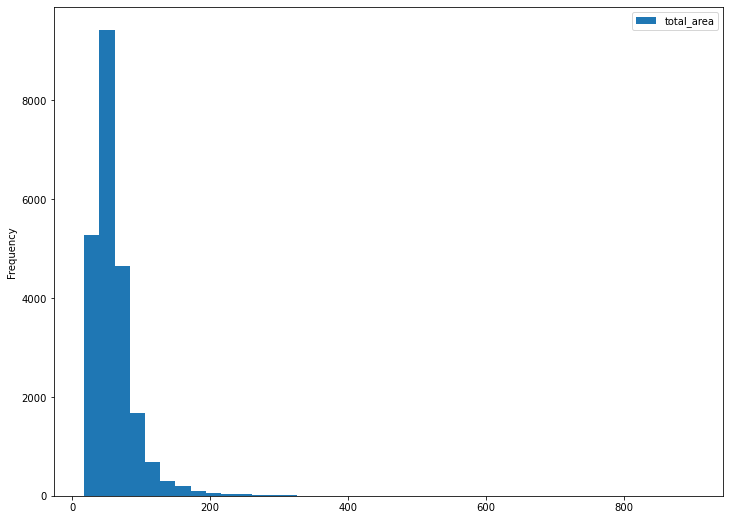

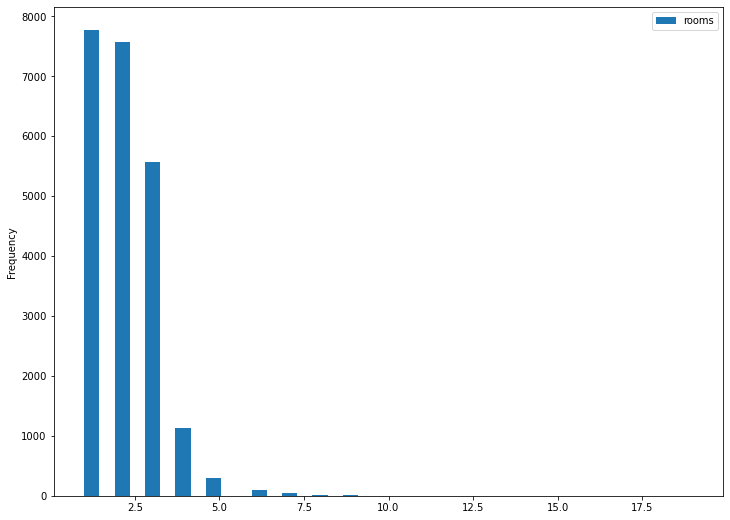

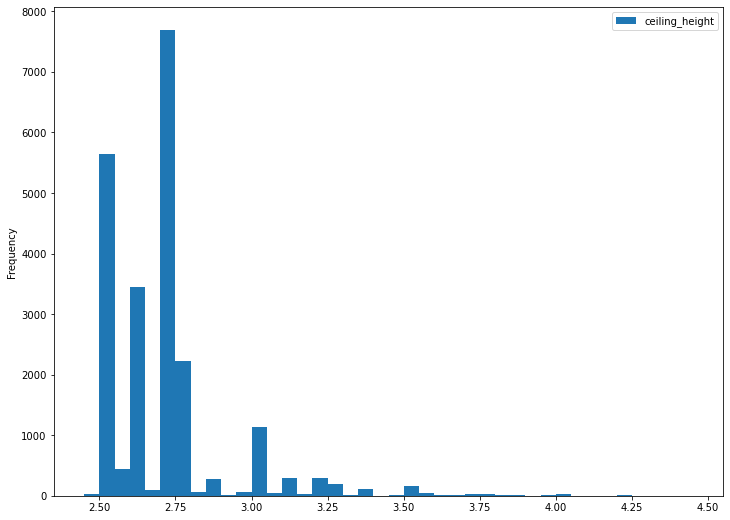

In [1350]:
for col in col_name:
    data.plot(kind='hist', y=col, bins=40, figsize=(12,9))

выводы по данным гистограммам были сделаны ранее, после обработки данных проверим, как зависит цена от этих параметров

## Изучите время продажи квартиры. Постройте гистограмму. Посчитайте среднее и медиану. Опишите, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?

In [1351]:
data['days_exposition'].describe()

count    22502.000000
mean       165.926251
std        194.492416
min          1.000000
25%         45.000000
50%         94.000000
75%        199.000000
max       1199.000000
Name: days_exposition, dtype: float64

<AxesSubplot:ylabel='Frequency'>

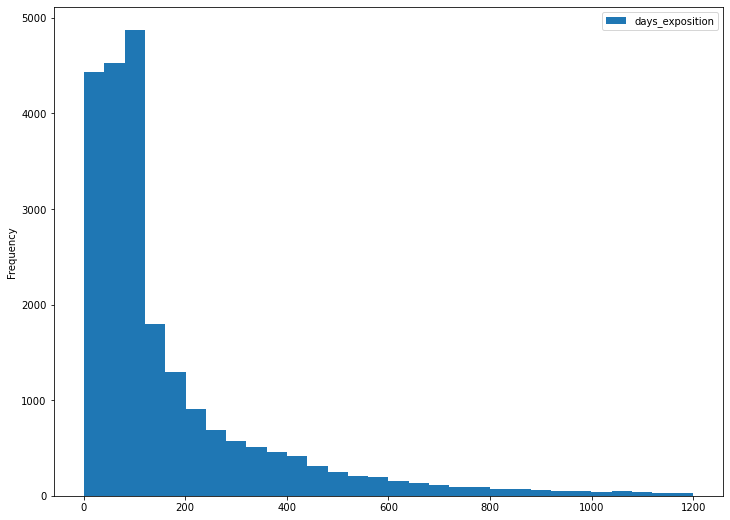

In [1352]:
data.plot(kind='hist', y='days_exposition', figsize=(12,9), bins=30)

Видим длинный хвост продажи квартир, что говорит нам о забытых или очень дорогих объявлениях в центре

<AxesSubplot:>

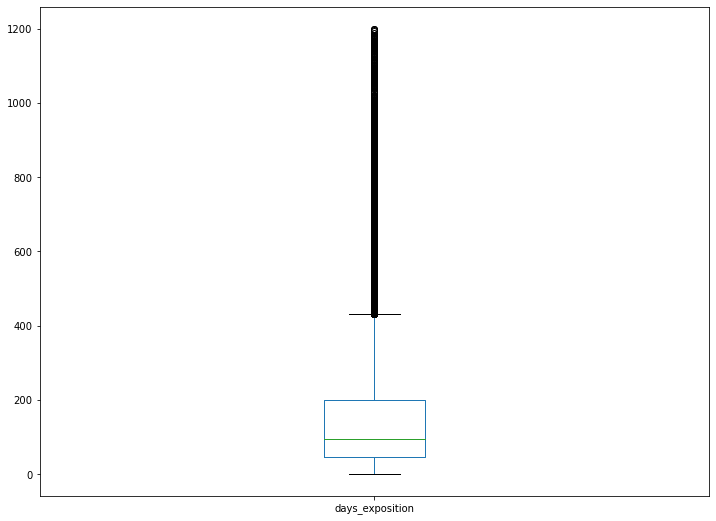

In [1353]:
data.plot(kind='box', y='days_exposition', figsize=(12,9))

По графику видим, что квартиры, которые продаются более 400 дней попадают в зону сверхдолгих, так же можно сказать, что квартиры проданные быстрее, чем за 45 дней --> относятся к категории быстрой продажи 

## Уберите редкие и выбивающиеся значения. Опишите, какие особенности обнаружили. 

Значения и особенности были убраны и описаны ранее

##  Какие факторы больше всего влияют на стоимость квартиры? Изучите, зависит ли цена от площади, числа комнат, удалённости от центра. Изучите зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом. Также изучите зависимость от даты размещения: дня недели, месяца и года.

In [1354]:
data.corr()['last_price']

total_images           0.104055
last_price             1.000000
total_area             0.637880
rooms                  0.357862
ceiling_height         0.288191
floors_total          -0.007330
living_area            0.554117
floor                  0.023744
kitchen_area           0.440280
balcony                0.011384
airports_nearest       0.103446
cityCenters_nearest   -0.190931
parks_around3000       0.192671
parks_nearest          0.116804
ponds_around3000       0.206462
ponds_nearest          0.089657
days_exposition        0.058399
metre_sq_price         0.740316
life_to_all           -0.031725
kitchen_area_to_all   -0.112006
Name: last_price, dtype: float64

видим, что чем больше общая площадь тем больше и цена квартиры(корреляуия значительна), кол-во комнат и высота потолков, тоже дают положительную корреляцию, так же стоит отметить, что покупатели хотят видеть большую кухню, но чтобы площадь этой кухн не была слишком большой в процентном соотношении с общей площадью

## Выберите 10 населённых пунктов с наибольшим числом объявлений. Посчитайте среднюю цену квадратного метра в этих населённых пунктах. Выделите среди них населённые пункты с самой высокой и низкой стоимостью жилья. Эти данные можно найти по имени в столбце 'locality_name'.

In [1355]:
top_area = data.pivot_table(index='locality_name', values=['balcony','total_area' ,'last_price'], aggfunc={'balcony' : 'count',
                                                                                                        'last_price' : 'sum',
                                                                                                          'total_area' : 'sum'})

Сгруппируем для дальнейшего подсчёта

In [1356]:
top_area.columns = ['count', 'last_price', 'total_area']

In [1357]:
top_area['meter_sq_mean'] = top_area['last_price'] / top_area['total_area']

In [1358]:
top_area = top_area.sort_values(by='count', ascending=False).head(10)

In [1359]:
top_meter_sq = top_area.sort_values(by='meter_sq_mean')

Отсортируем по средней цене за кв.м

In [1360]:
top_meter_sq

,count,last_price,total_area,meter_sq_mean
locality_name,,,,
выборг,220,725333000,12469,58170.903842
всеволожск,386,1476399965,21666,68143.633573
гатчина,276,991029360,14117,70201.130552
колпино,328,1310329246,17515,74811.832486
посёлок шушары,428,1772215999,23155,76537.076182
посёлок мурино,489,1833459680,22023,83252.040140
посёлок парголово,319,1435445459,16275,88199.413763
деревня кудрово,282,1223954220,13411,91264.948177
пушкин,334,2204357964,20830,105826.114450


Больше всего объявлений в СПБ, меньше всего в Выборге, так же в Выборге меньше всего стоит кв метр,  а в СПБ больше всего, сравним эти два города

In [1361]:
compare_data(top_meter_sq.loc['выборг'], top_meter_sq.loc['санкт-петербург'])

Среднее значение last_price для 725333000.0 сравниваем с 120718442900.0 их отношение : 0.006008468818644777


Видим, что хоть выборг входит в топ 10 по объявлениям и кв.м, но по средней цене сильно отстаёт от СПБ

## Изучите предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделите квартиры в Санкт-Петербурге ('locality_name'). Ваша задача — выяснить, какая область входит в центр. Создайте столбец с расстоянием до центра в километрах: округлите до целых значений. После этого посчитайте среднюю цену для каждого километра. Постройте график: он должен показывать, как цена зависит от удалённости от центра. Определите границу, где график сильно меняется — это и будет центральная зона.

In [1362]:
data_spb = data.query('locality_name == "санкт-петербург"')

In [1363]:
data_spb['cityCenters_nearest']

0        16028
2        13933
4         8098
7        11634
9        15008
         ...  
23689    16081
23690     6263
23691     4489
23694     4232
23697    10364
Name: cityCenters_nearest, Length: 15177, dtype: int64

In [1364]:
data_spb['centre_km'] = data_spb['cityCenters_nearest'] / 1000

In [1365]:
data_spb['centre_km'] = data_spb['centre_km'].astype('int64')

In [1366]:
centre_km_cost = data_spb.pivot_table(index='centre_km', values=['last_price', 'total_area'], aggfunc={'last_price': 'sum',
                                                                                                    'total_area': 'sum'})

In [1367]:
centre_km_cost['mean_cost'] = centre_km_cost['last_price'] / centre_km_cost['total_area']

In [1368]:
centre_km_cost = centre_km_cost.reset_index()

<AxesSubplot:xlabel='centre_km', ylabel='mean_cost'>

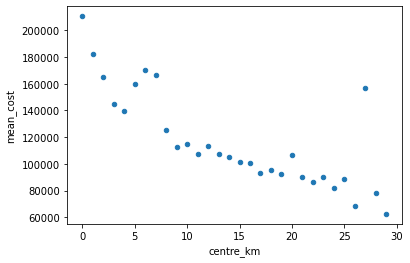

In [1369]:
centre_km_cost.plot(kind='scatter', x='centre_km', y='mean_cost')

примерно на границе 6-7 км у нас есть  резкий спад, который может означать радиус центра города, потом идёт возрастание, это возможно офисные  здания и бизнес центры, в дальнйшем идёт только спад, это застроенная жилая часть города

## Выделите сегмент квартир в центре. Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков. Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделайте выводы. Отличаются ли они от общих выводов по всему городу?

In [1370]:
data_spb_center = data.query('locality_name == "санкт-петербург" and cityCenters_nearest <= 7000')

In [1371]:
data_spb_near = data.query('locality_name == "санкт-петербург" and cityCenters_nearest > 7000')

In [1372]:
data_spb_center.corr()['last_price']

total_images           0.134770
last_price             1.000000
total_area             0.583406
rooms                  0.295738
ceiling_height         0.115562
floors_total           0.044062
living_area            0.494329
floor                  0.106224
kitchen_area           0.361391
balcony                0.084907
airports_nearest       0.068517
cityCenters_nearest   -0.056287
parks_around3000       0.099846
parks_nearest          0.010033
ponds_around3000       0.090233
ponds_nearest         -0.012522
days_exposition        0.042320
metre_sq_price         0.799145
life_to_all           -0.026406
kitchen_area_to_all   -0.108641
Name: last_price, dtype: float64

In [1373]:
mass_param = ['total_area', 'last_price', 'rooms', 'ceiling_height']

In [1374]:
sbp_center_mean = []

In [1375]:
spb_near_mean = []

In [1376]:
for col in mass_param:
    sbp_center_mean.append(data_spb_center[col].sum() / len(data_spb_center))
    spb_near_mean.append(data_spb_near[col].sum() / len(data_spb_near))

In [1377]:
spb_near_mean

[56.9476135040745, 6253509.010726758, 2.003409279893564, 2.6803376018626315]

In [1378]:
sbp_center_mean

[91.91304347826087, 14444222.004760394, 2.8483021263091084, 2.9619168517930814]

In [1379]:
for index in range(len(mass_param)):
    print(f'{mass_param[index]}: center vs suburb : {sbp_center_mean[index] - spb_near_mean[index]}')

total_area: center vs suburb : 34.96542997418637
last_price: center vs suburb : 8190712.994033636
rooms: center vs suburb : 0.8448928464155445
ceiling_height: center vs suburb : 0.2815792499304499


##  Вывод: как видим в центре в среднем на одну комнату больше, по площади на 34 м^2, а потолки выше на 28 см, так же очень сильно вырастает цена 8 миллионов. Но так же посмотрев корреляцию по цене можно сказать, что зависимости практически не изменились, т.е можно сказать, что если квартира в центре при прочих равных, она юудет стоить больше

### Шаг 5. Общий вывод: Проанализировав данные и обработав их мы получили следующие результаты: 1) цена сильно зависит от размера квартиры 2) Аналогично можно проследить зависимость между кол-вом комнат и ценой. 3) Высота потолков тоже важна  4) Из странностей можно выделить, что многие хотят большую кухню, но кухня не должна занимать много жилого места. 5) Так же отрицательно на цену повлияло растояние(удаление) от центра. Нахождение рядом с водоёмом или парком в положительном ключе повлияло на цену, но не слишком сильно. Близкое расположение водома дале небольшой негативный эффект. Были полученны средние значения цен в Питере по центру и в отдалении 7 км о него, где явно прослеживался ценовой разброс, но корреляция не изменилась.

### Из мошенических действий можно выделить, что при площади кв 20 м, было по 3 комнаты, (можно сказать, что на каждые 20 кв.м не более 2 комнат), цена за кв.м должна быть не меньше 15-20 т.р, были квартиры за кв.м по 100 р, по остальным параметрам высота потолков не менее 2.5 метров и площадь кухни не менее 5 кв.м


### Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл
- [x]  файлы изучены (выведены первые строки, метод info())
- [x]  определены пропущенные значения
- [x]  заполнены пропущенные значения
- [x]  есть пояснение, какие пропущенные значения обнаружены
- [x]  изменены типы данных
- [x]  есть пояснение, в каких столбцах изменены типы и почему
- [x]  посчитано и добавлено в таблицу: цена квадратного метра
- [x]  посчитано и добавлено в таблицу: день недели, месяц и год публикации объявления
- [x]  посчитано и добавлено в таблицу: этаж квартиры; варианты — первый, последний, другой
- [x]  посчитано и добавлено в таблицу: соотношение жилой и общей площади, а также отношение площади кухни к общей
- [x]  изучены следующие параметры: площадь, цена, число комнат, высота потолков
- [x]  построены гистограммы для каждого параметра
- [x]  выполнено задание: "Изучите время продажи квартиры. Постройте гистограмму. Посчитайте среднее и медиану. Опишите, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?"
- [x]  выполнено задание: "Уберите редкие и выбивающиеся значения. Опишите, какие особенности обнаружили."
- [x]  выполнено задание: "Какие факторы больше всего влияют на стоимость квартиры? Изучите, зависит ли цена от квадратного метра, числа комнат, этажа (первого или последнего), удалённости от центра. Также изучите зависимость от даты размещения: дня недели, месяца и года. "Выберите 10 населённых пунктов с наибольшим числом объявлений. Посчитайте среднюю цену квадратного метра в этих населённых пунктах. Выделите населённые пункты с самой высокой и низкой стоимостью жилья. Эти данные можно найти по имени в столбце '*locality_name'*. "
- [x]  выполнено задание: "Изучите предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделите квартиры в Санкт-Петербурге (*'locality_name'*). Ваша задача — выяснить, какая область входит в центр. Создайте столбец с расстоянием до центра в километрах: округлите до целых значений. После этого посчитайте среднюю цену для каждого километра. Постройте график: он должен показывать, как цена зависит от удалённости от центра. Определите границу, где график сильно меняется — это и будет центральная зона. "
- [x]  выполнено задание: "Выделите сегмент квартир в центре. Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков. Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделайте выводы. Отличаются ли они от общих выводов по всему городу?"
- [x]  в каждом этапе есть выводы
- [x]  есть общий вывод